In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import numpy as np
import trueq as tq

cycle1 = {0: tq.Gate.h}
cycle2 = {(0, 1): tq.Gate.cz}
cycle3 = {1: tq.Gate.h}

circuit = tq.Circuit([cycle1, cycle2, cycle3] * 3)
circuit.measure_all()
circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

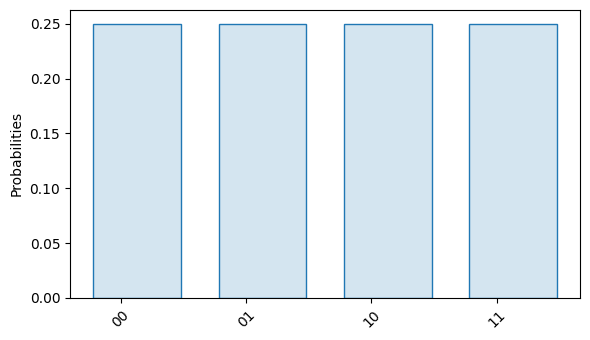

In [3]:
sim = tq.Simulator()
ideal_result = sim.sample(circuit, n_shots=np.inf)
ideal_result.plot()

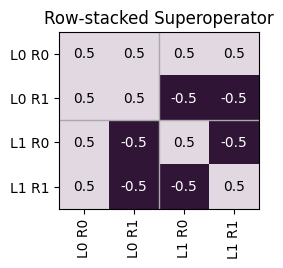

In [4]:
circuit_operator = sim.operator(circuit).mat()
tq.math.Superop(circuit_operator).plot_rowstack()

In [5]:
n_compilations = 30
rc_circuits = tq.randomly_compile(circuit, n_compilations=n_compilations)

In [6]:
rc_circuits[0].draw()

DisplayWrapper(<svg xmlns="http://w...)

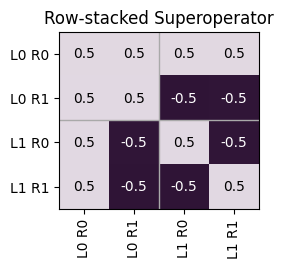

In [7]:
rc_circuit_operator = sim.operator(rc_circuits[0]).mat()
tq.math.Superop(rc_circuit_operator).plot_rowstack()

In [8]:
tq.math.proc_infidelity(circuit_operator, rc_circuit_operator)

-8.881784197001252e-16

In [9]:
for rc_circuit in rc_circuits:
    assert tq.utils.dicts_close(sim.sample(rc_circuit, n_shots=np.inf), ideal_result)

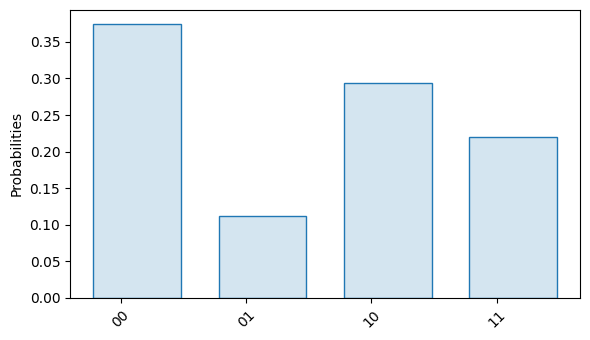

In [10]:
noisy_sim = tq.Simulator().add_overrotation(single_sys=0.1, multi_sys=0.1)
noisy_result = noisy_sim.sample(circuit, n_shots=np.inf)
noisy_result.plot()

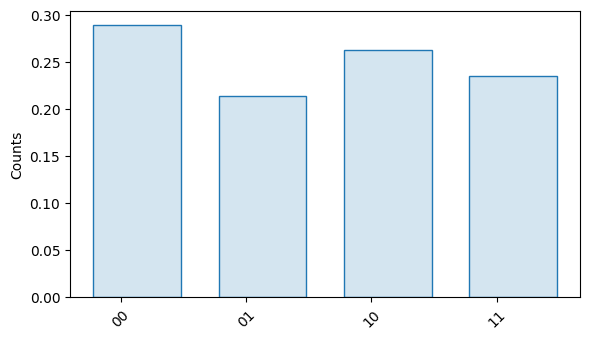

In [11]:
# run all circuits on the simulator
noisy_sim.run(rc_circuits, n_shots=np.inf)

# sum over the outcomes
rc_result = rc_circuits.sum_results()

# for plotting, we normalize the summed results to be between 0 and 1
rc_result.normalized().plot()

In [12]:
bare_tvd = noisy_result.tvd(ideal_result)
rc_tvd = rc_result.normalized().tvd(ideal_result)

print("Noisy simulation without RC: {:.4f}".format(bare_tvd[0]))
print("Noisy simulation with RC: {:.4f}".format(rc_tvd[0]))

Noisy simulation without RC: 0.1686
Noisy simulation with RC: inf


         (/home/jenkins/workspace/release trueq/trueq/results.py:489)


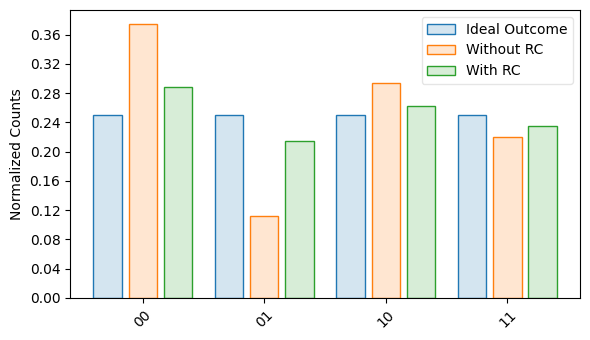

In [13]:
tq.visualization.plot_results(
    ideal_result,
    noisy_result,
    rc_result,
    labels=["Ideal Outcome", "Without RC", "With RC"],
)

In [14]:
tq.settings.set_dim(3)

cycle1 = {0: tq.Gate.f3}
cycle2 = {(0, 1): tq.Gate.cz3}
cycle3 = {1: tq.Gate.f3}

circuit = tq.Circuit([cycle1, cycle2, cycle3] * 3)
circuit.measure_all()

circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [15]:
n_compilations = 30
rc_circuits = tq.randomly_compile(circuit, n_compilations=n_compilations)

# show a sample circuit
rc_circuits[0].draw()

DisplayWrapper(<svg xmlns="http://w...)

In [16]:
ideal_sim = tq.Simulator()
ideal_result = ideal_sim.sample(circuit, n_shots=np.inf)

noisy_sim = tq.Simulator().add_overrotation(single_sys=0.1, multi_sys=0.2)
noisy_result = noisy_sim.sample(circuit, n_shots=np.inf)

noisy_sim.run(rc_circuits, n_shots=np.inf)
rc_result = rc_circuits.sum_results().normalized()

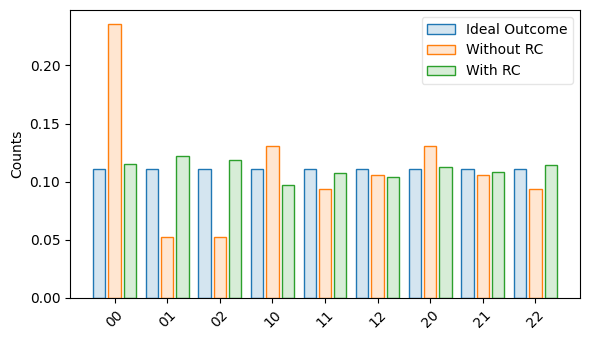

In [17]:
tq.visualization.plot_results(
    ideal_result,
    noisy_result,
    rc_result,
    labels=["Ideal Outcome", "Without RC", "With RC"],
)